In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [2]:
from IPython.core.interactiveshell import InteractiveShell as IS
IS.ast_node_interactivity = "all"

In [34]:
veriler = pd.read_csv('data/maaslar.csv')
maaslar = veriler.copy()
maaslar.head()

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500


In [4]:
x = maaslar.iloc[:,1:2]
y = maaslar.iloc[:,2:]
X = x.values
Y = y.values

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, Y)

LinearRegression()

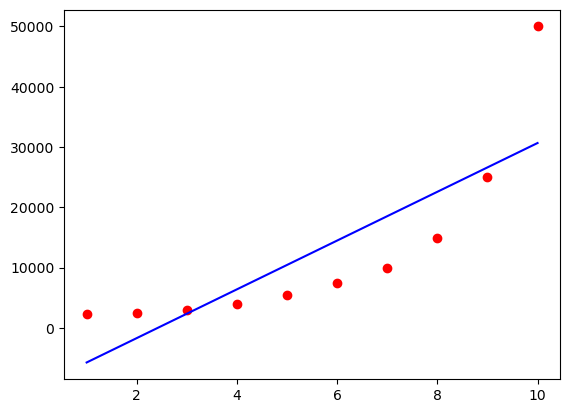

In [6]:
plt.scatter(X, Y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.show()

In [7]:
def show_plot(X, Y, predict_y):
    plt.scatter(X, Y, color='red')
    plt.plot(X, predict_y, color='blue')

LinearRegression()

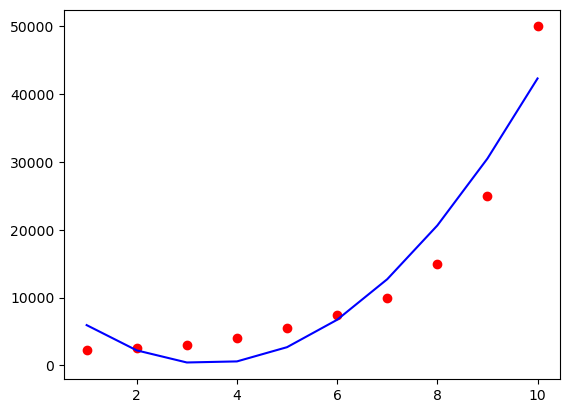

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg  = PolynomialFeatures(degree=2)
x_poly    = poly_reg.fit_transform(X)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)
show_plot(X, Y, lin_reg_2.predict(poly_reg.fit_transform(X)))

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc_1      = StandardScaler()
x_olcekli = sc_1.fit_transform(X)
sc_2      = StandardScaler()
y_olcekli = np.ravel(sc_2.fit_transform(Y.reshape(-1, 1)))

In [11]:
sc_2.fit_transform(Y.reshape(-1, 1))
np.ravel(sc_2.fit_transform(Y.reshape(-1, 1)))

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

array([-0.72004253, -0.70243757, -0.66722767, -0.59680786, -0.49117815,
       -0.35033854, -0.17428902,  0.17781001,  0.88200808,  2.64250325])

SVR()

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

array([[ 2250],
       [ 2500],
       [ 3000],
       [ 4000],
       [ 5500],
       [ 7500],
       [10000],
       [15000],
       [25000],
       [50000]])

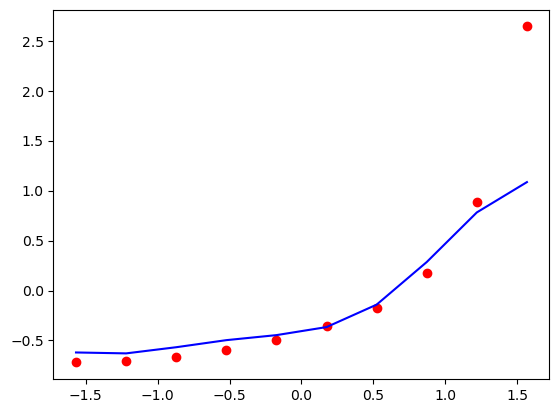

In [12]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_olcekli, y_olcekli)
show_plot(x_olcekli, y_olcekli, svr_reg.predict(x_olcekli))
X
Y

DecisionTreeRegressor(random_state=0)

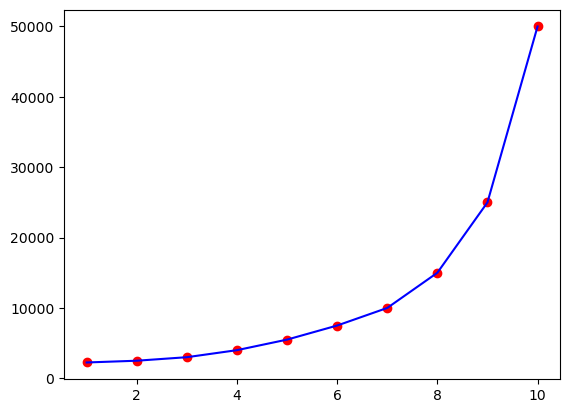

In [13]:
from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(X, Y)
plt.scatter(X, Y, color='red')
plt.plot(X, r_dt.predict(X), color='blue')

In [14]:
print(r_dt.predict([[11]]))
print(r_dt.predict([[6.6]]))

[50000.]
[10000.]


**NOT:** Buradan anlaşılacağı üzere, yukarıdaki kod ile aşağıdaki kod aynı sonucu vermektedir. Yani değerler **Z** ve **K** arasında hangi bölgede olursa olsun, o değerin arasında kalan tam sayı değeri aynı olacaktır. Örneğin, 1. ayın değeri isteniyorsa, değerleri 1.5 - 0.6 aralığının 1 değerine karşılık geleceği anlaşılır.

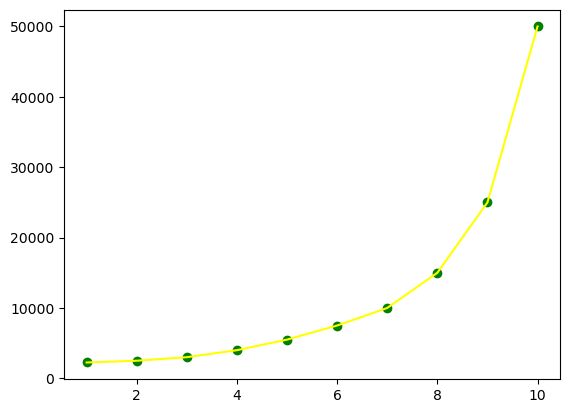

In [15]:
Z = X + 0.5
K = X - 0.4
plt.scatter(X, Y, color='green') 
plt.plot(X, r_dt.predict(X), color='yellow')

In [16]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 10, random_state = 0) 
rf_reg.fit(X, Y.ravel())
rf_reg.predict([[6.5]])
rf_reg.predict([[6.6]])

RandomForestRegressor(n_estimators=10, random_state=0)

array([8350.])

array([10500.])

**Karar Ağaçları alabileci min-max değerleri arasında sonuç değişmez iken Rassal Ağaçlar değişir.**

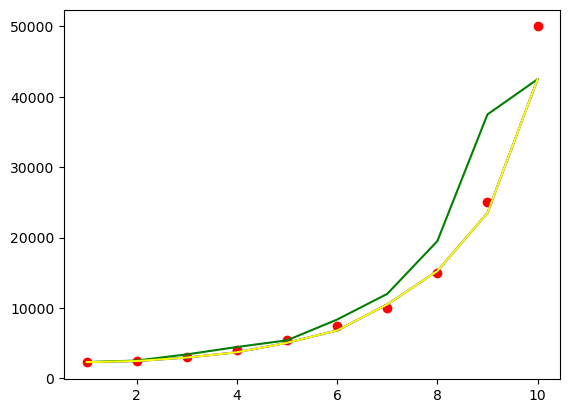

In [17]:
plt.scatter(X, Y, color= 'red')
plt.plot(X, rf_reg.predict(X), color='blue')
plt.plot(X, rf_reg.predict(X + 0.5), color='green')
plt.plot(X, rf_reg.predict(X - 0.4), color='yellow')

In [19]:
from sklearn.metrics import r2_score

In [45]:
r2_score(Y, rf_reg.predict(X))
r2_score(Y, rf_reg.predict(K))
r2_score(Y, rf_reg.predict(Z))
r2_score(y_olcekli, svr_reg.predict(x_olcekli))
r2_score(Y, lin_reg_2.predict(poly_reg.fit_transform(X)))
r2_score(Y, lin_reg.predict(X))
r2_score(Y, rf_reg.predict(X), multioutput='uniform_average')
r2_score(Y, rf_reg.predict(X), multioutput='variance_weighted')
r2_score(Y, rf_reg.predict(X), multioutput='raw_values')[0]
r2_score(Y, rf_reg.predict(X), force_finite=False)

0.9704434230386582

0.9704434230386582

0.8820523231127324

0.7513836788854973

0.9162082221443942

0.6690412331929894

0.9704434230386582

0.9704434230386582

0.9704434230386582

0.9704434230386582